[[10  1  9]
 [ 1  1 17]
 [ 2  0 20]]
              precision    recall  f1-score   support

           0       0.77      0.50      0.61        20
           1       0.50      0.05      0.10        19
           2       0.43      0.91      0.59        22

    accuracy                           0.51        61
   macro avg       0.57      0.49      0.43        61
weighted avg       0.56      0.51      0.44        61

output: [2 2 2 2 2 2 2 1 1 2 0 0 0 2 2 0 2 2 2 2 2 2 2 2 2 2 0 2 0 2 2 0 2 2 2 2 2
 2 2 2 2 0 2 0 2 2 2 2 0 0 2 2 0 2 2 2 0 2 2 2 2]
test accuracy: 0.5081967213114754


Text(0.5, 1.0, 'Confusion matrix of NB')

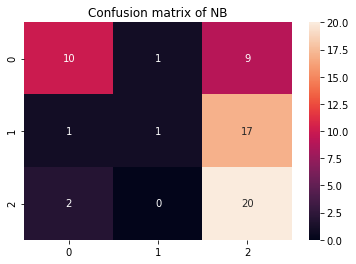

In [1]:
from sklearn.naive_bayes import GaussianNB
import pandas as pd
from sklearn import preprocessing
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
%matplotlib inline

def convert(data):
    number = preprocessing.LabelEncoder()
    data['age'] = number.fit_transform(data.age)
    data['gender'] = number.fit_transform(data.gender)
    data['type'] = number.fit_transform(data.type)
    data['gradeVA'] = number.fit_transform(data.gradeVA)
    data['RAPD'] = number.fit_transform(data.RAPD)
    data['zone'] = number.fit_transform(data.zone)
    data['traumaticcataract'] = number.fit_transform(data.traumaticcataract)
    data['TON'] = number.fit_transform(data.TON)
    data['FB'] = number.fit_transform(data.FB)
    data['RD'] = number.fit_transform(data.RD)
    data['Endophthalmitis'] = number.fit_transform(data.Endophthalmitis)
    data['OTStotalscore'] = number.fit_transform(data.OTStotalscore)
    data['lastFUBGrade'] = number.fit_transform(data.lastFUBGrade)       
    data=data.fillna(-999)
    return data

data = pd.read_csv("ogithreeCat.csv")
data = convert(data)

temp = data.drop('lastFUBGrade', axis=1)
y = data['lastFUBGrade']
X  = (temp-np.min(temp))/(np.max(temp)-np.min(temp))
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)
model = GaussianNB()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print ("output:", y_pred)
print("test accuracy:",model.score(X_test,y_test))

cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm, annot=True, fmt='d').set_title('Confusion matrix of NB') # fmt='d' formats the numbers as digits, which means integers



In [2]:
from sklearn.naive_bayes import GaussianNB
import pandas as pd
from sklearn import preprocessing
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
%matplotlib inline

def convert(data):
    number = preprocessing.LabelEncoder()
    data['age'] = number.fit_transform(data.age)
    data['gender'] = number.fit_transform(data.gender)
    data['type'] = number.fit_transform(data.type)
    data['gradeVA'] = number.fit_transform(data.gradeVA)
    data['RAPD'] = number.fit_transform(data.RAPD)
    data['zone'] = number.fit_transform(data.zone)
    data['traumaticcataract'] = number.fit_transform(data.traumaticcataract)
    data['TON'] = number.fit_transform(data.TON)
    data['FB'] = number.fit_transform(data.FB)
    data['RD'] = number.fit_transform(data.RD)
    data['Endophthalmitis'] = number.fit_transform(data.Endophthalmitis)
    data['OTStotalscore'] = number.fit_transform(data.OTStotalscore)
    data['lastFUBGrade'] = number.fit_transform(data.lastFUBGrade)       
    data=data.fillna(-999)
    return data

data = pd.read_csv("ogithreeCat.csv")
data = convert(data)

temp = data.drop('lastFUBGrade', axis=1)
y = data['lastFUBGrade']
X  = (temp-np.min(temp))/(np.max(temp)-np.min(temp))
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

kf = KFold(n_splits=10, random_state=42, shuffle=True)

model = GaussianNB()
for train_index, test_index in kf.split(X):
   #split the data
   X_train, X_test = X.iloc[train_index], X.iloc[test_index]
   y_train, y_test = y.iloc[train_index], y.iloc[test_index]
   #fit the model
   model.fit(X_train, y_train)
   #make predictions
   predictions = model.predict(X_test)
   #calculate accuracy
   accuracy = model.score(X_test, y_test)
   print('Accuracy:', accuracy)
    
    
print ("output:", y_pred) 
print("test accuracy:",model.score(X_test,y_test))


Accuracy: 0.5806451612903226
Accuracy: 0.7
Accuracy: 0.6
Accuracy: 0.5666666666666667
Accuracy: 0.5333333333333333
Accuracy: 0.7333333333333333
Accuracy: 0.6333333333333333
Accuracy: 0.6333333333333333
Accuracy: 0.7666666666666667
Accuracy: 0.6666666666666666
output: [2 2 2 2 2 2 2 1 1 2 0 0 0 2 2 0 2 2 2 2 2 2 2 2 2 2 0 2 0 2 2 0 2 2 2 2 2
 2 2 2 2 0 2 0 2 2 2 2 0 0 2 2 0 2 2 2 0 2 2 2 2]
test accuracy: 0.6666666666666666
